In [9]:
%load_ext autoreload

In [26]:
%autoreload 2

In [11]:

# notebook/task1_notebook.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np

# Import custom scripts
import sys
sys.path.append('../scripts')  # Add the scripts directory to the path

from handle_missing_values import handle_missing_values
from data_cleaning import clean_data
from exploratory_data_analysis import perform_eda
from geolocation_analysis import merge_geolocation_data
from feature_engineering import create_features
from normalization_scaling import normalize_data
from encode_categorical_features import encode_categorical_features


In [12]:
# Load datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_country = pd.read_csv('../data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('../data/creditcard.csv')



In [13]:
# 1. Handle Missing Values
fraud_data = handle_missing_values(fraud_data)
creditcard_data = handle_missing_values(creditcard_data)


c:\Users\Tsebaot\Desktop\week 8\fraud-detection-ml\notebooks\../scripts\handle_missing_values.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\Tsebaot\Desktop\week 8\fraud-detection-ml\notebooks\../scripts\handle_missing_values.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [14]:

# 2. Data Cleaning
fraud_data = clean_data(fraud_data)
creditcard_data = clean_data(creditcard_data)


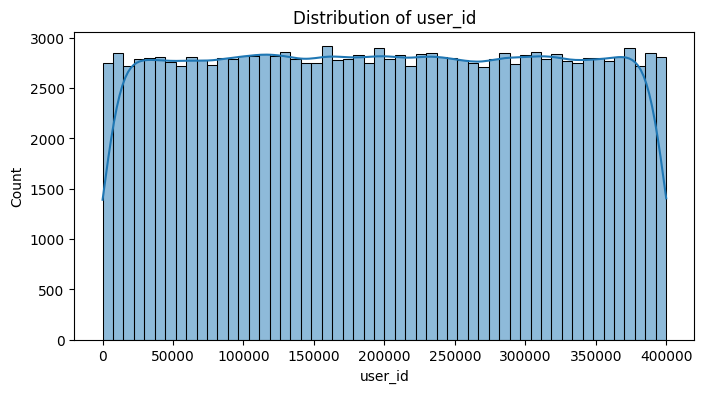

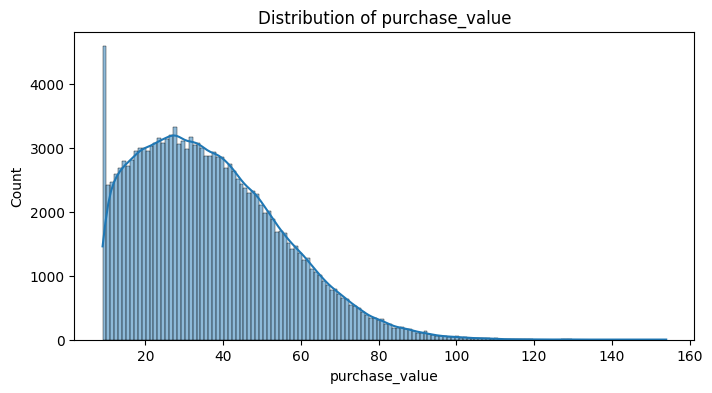

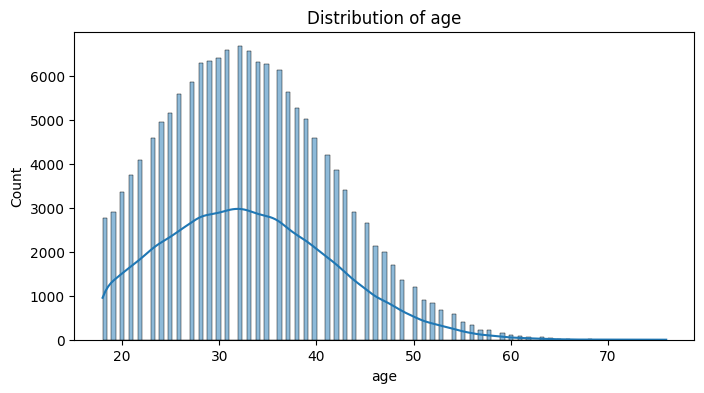

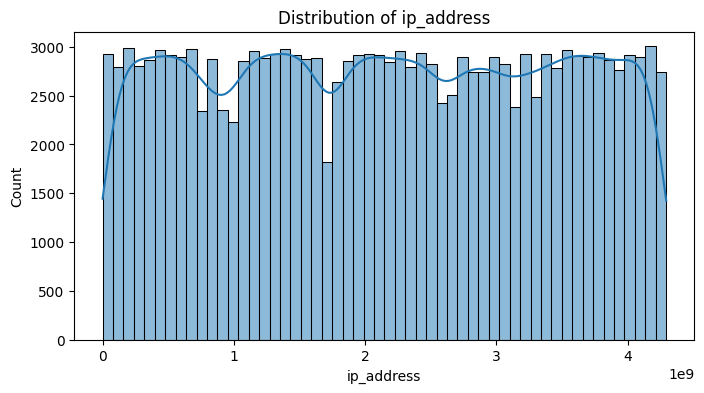

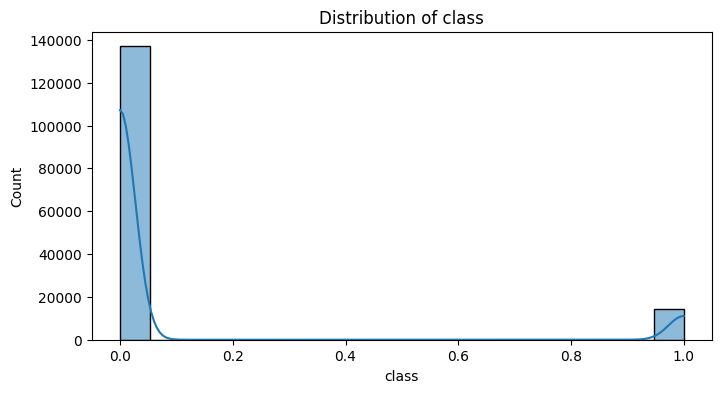

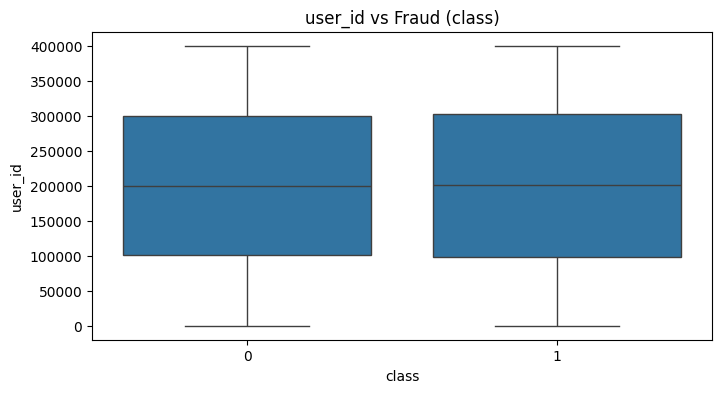

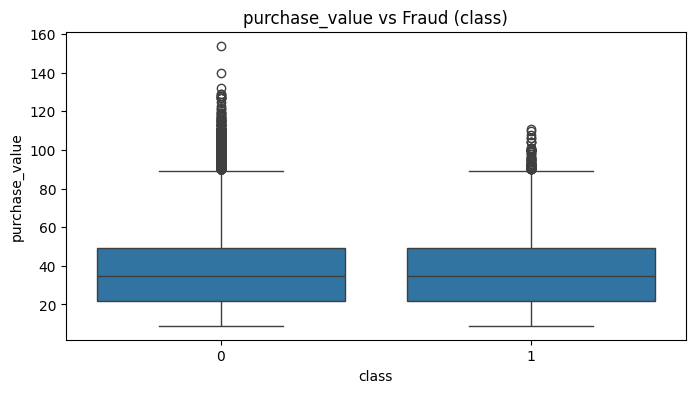

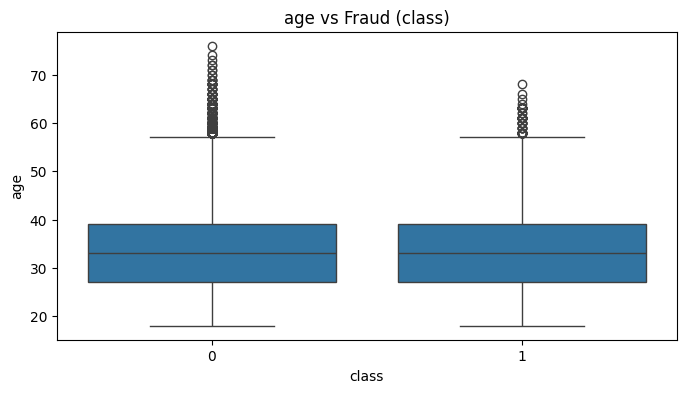

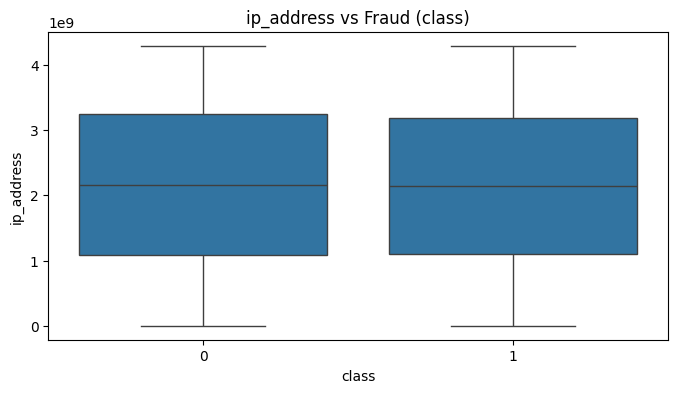

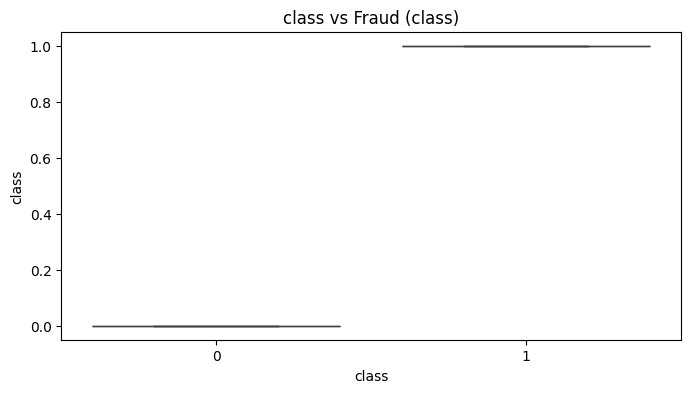

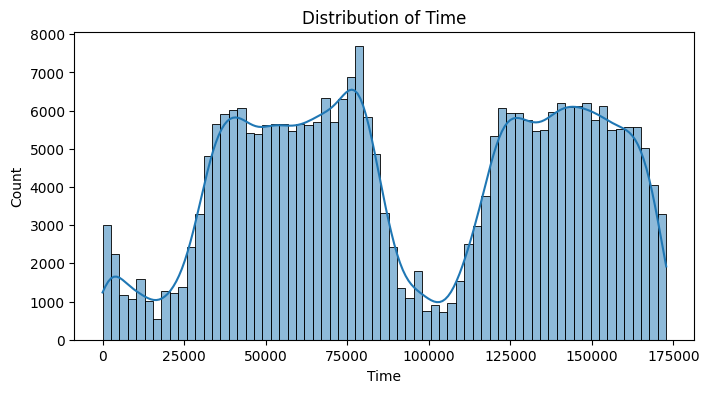

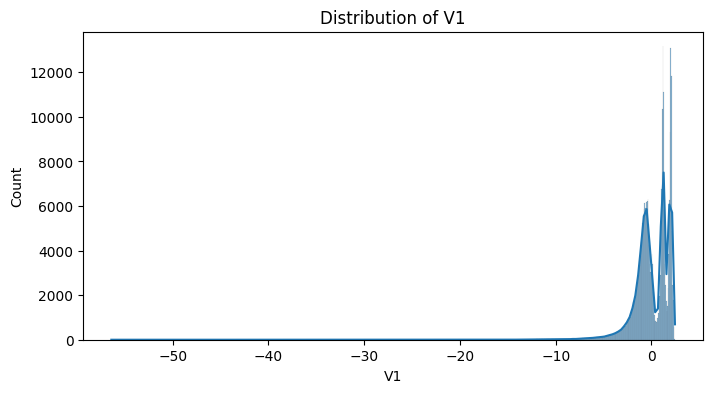

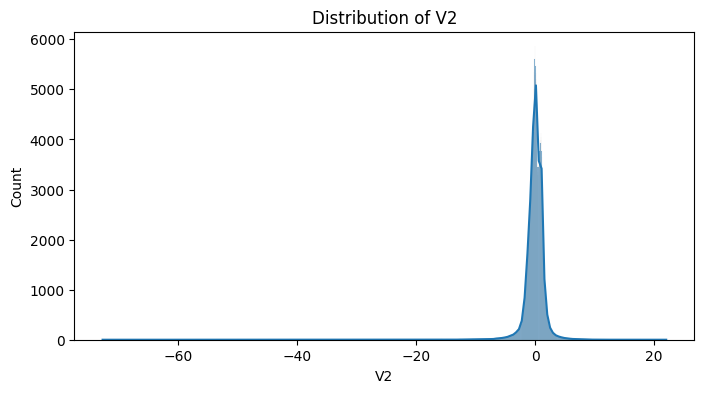

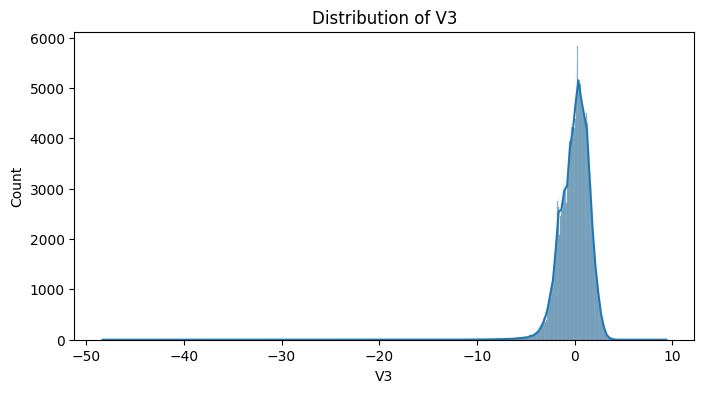

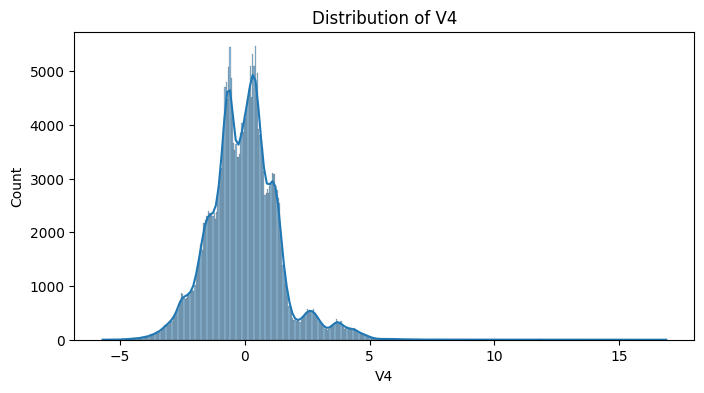

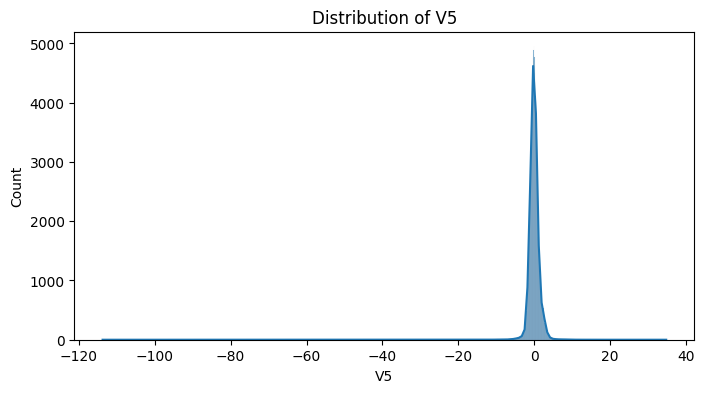

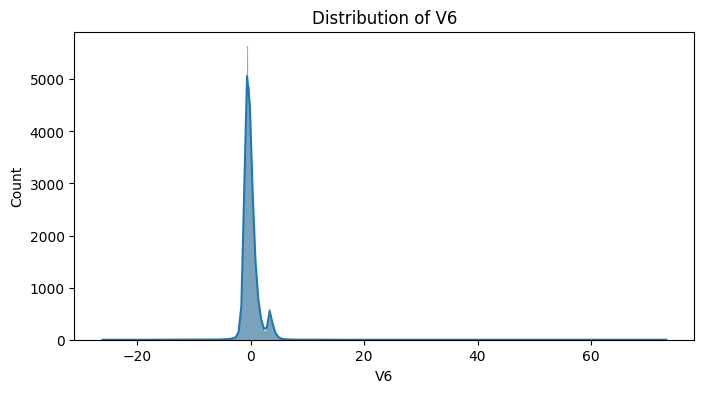

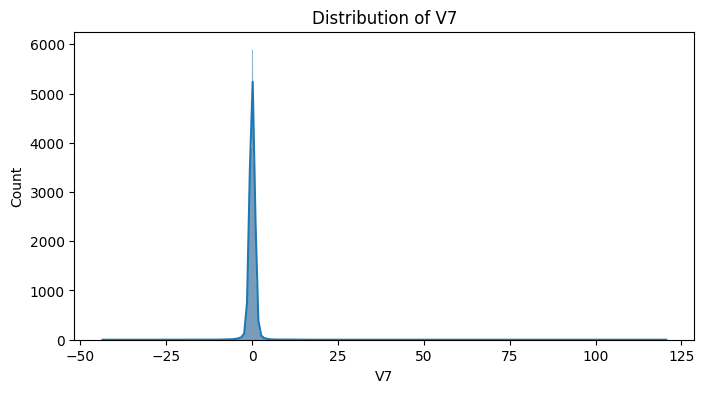

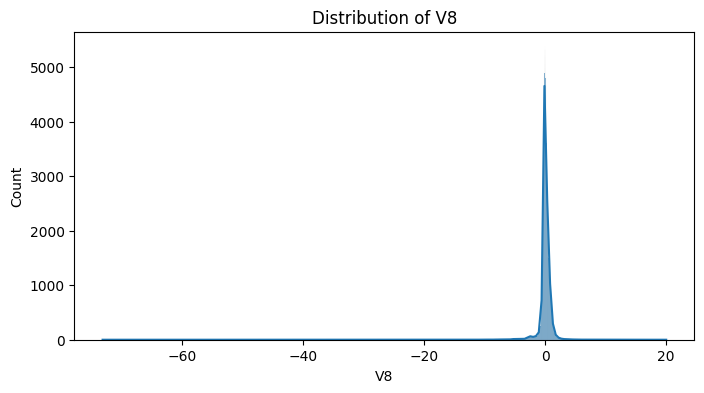

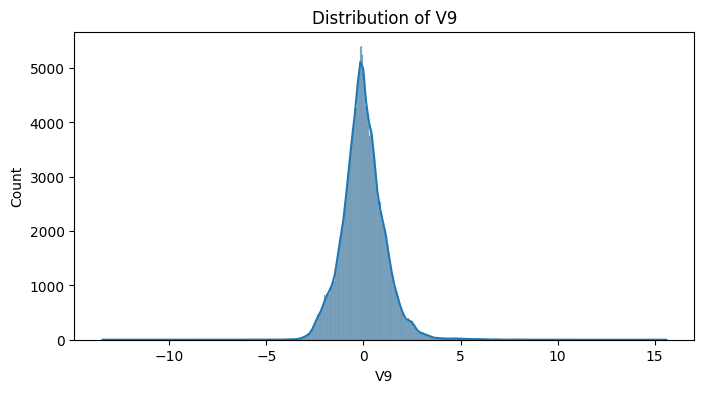

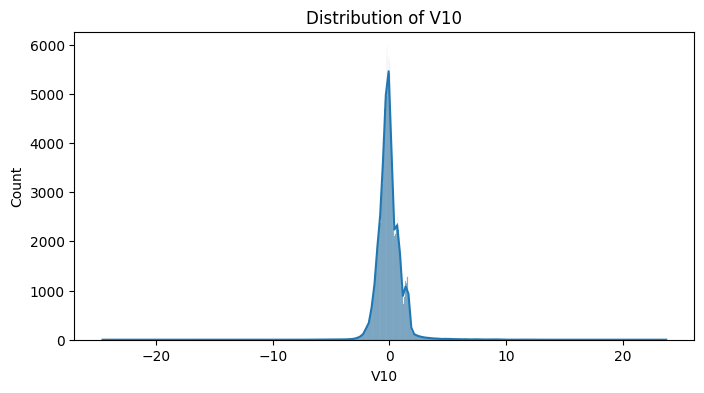

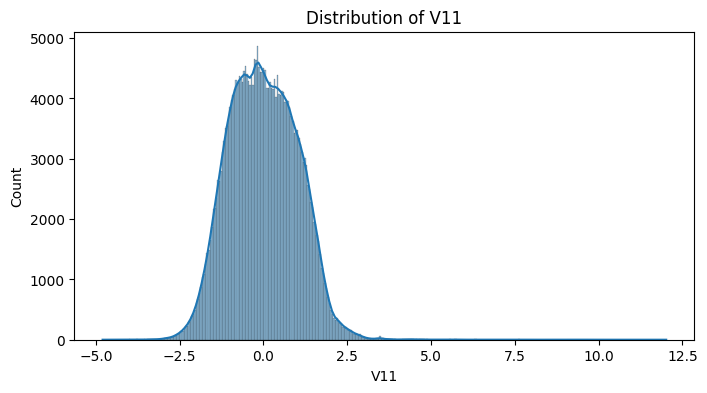

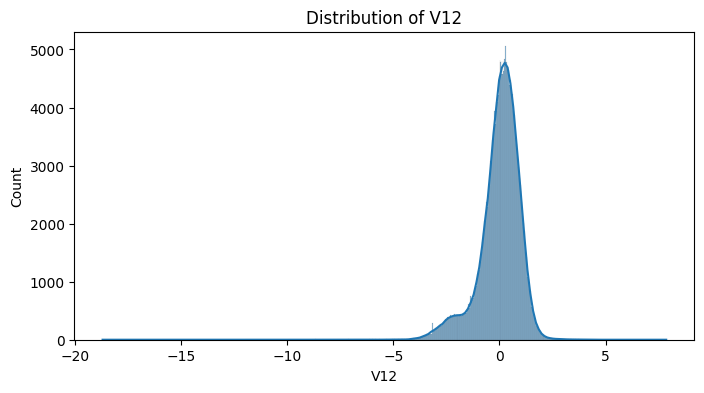

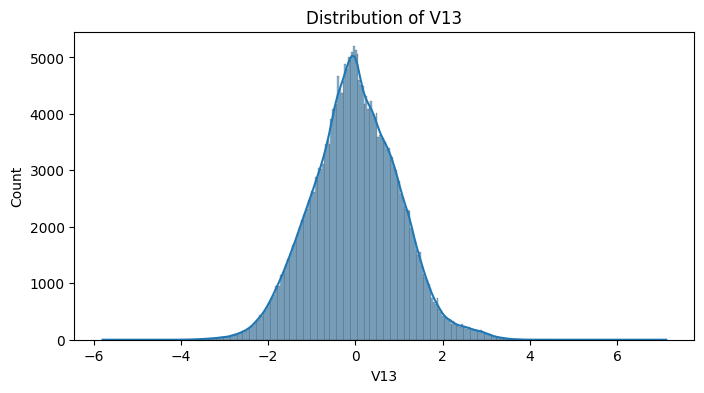

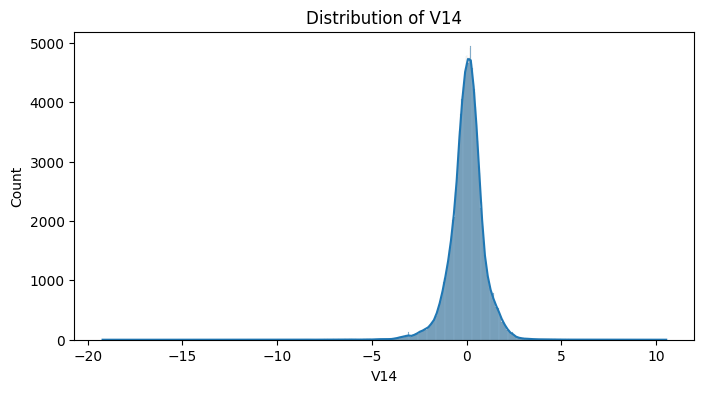

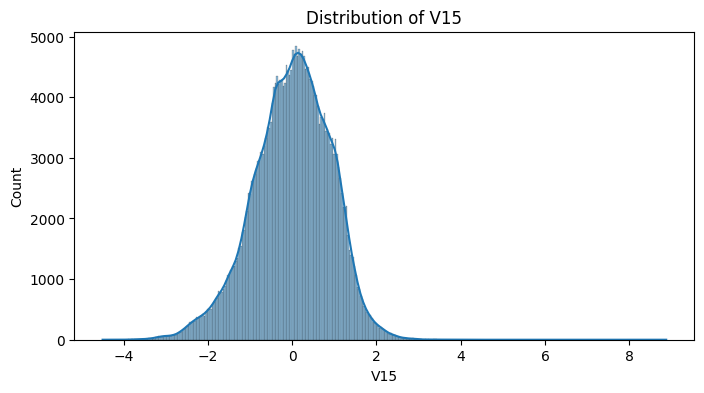

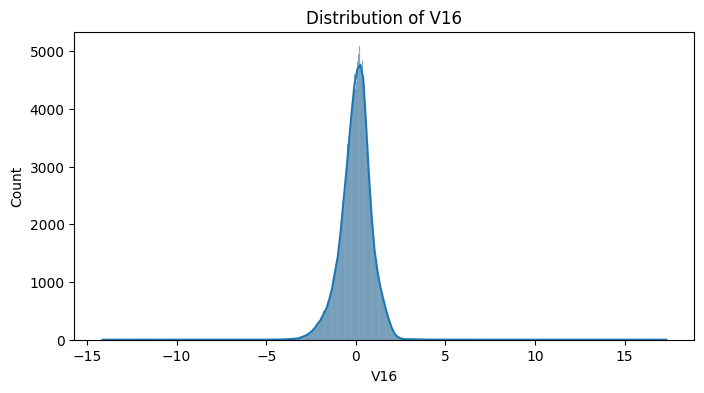

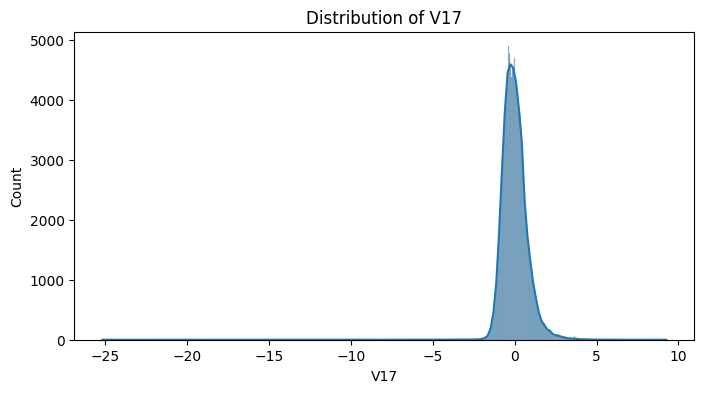

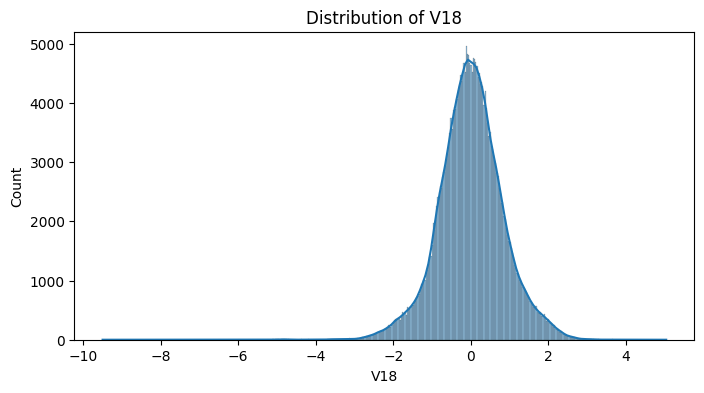

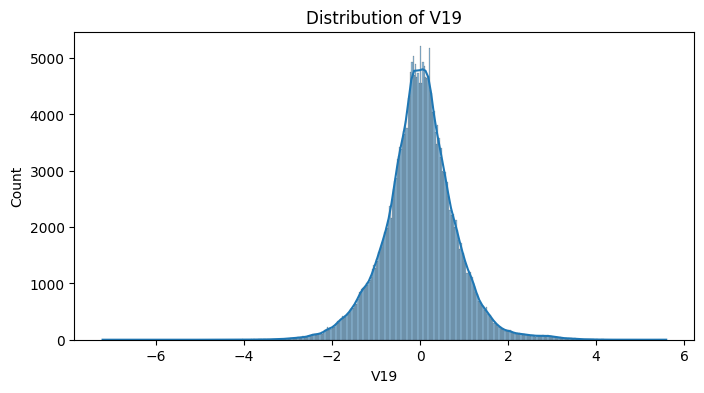

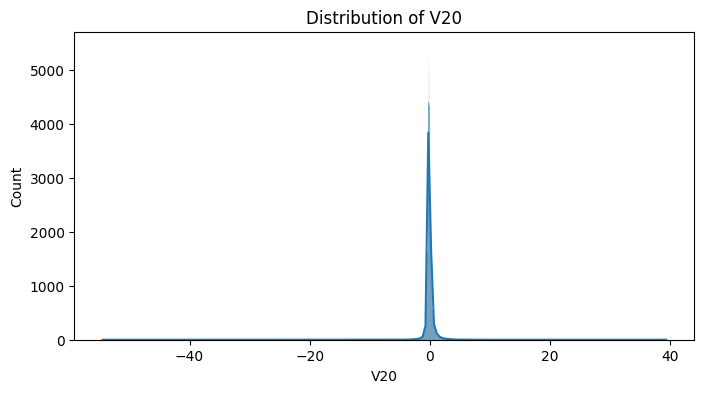

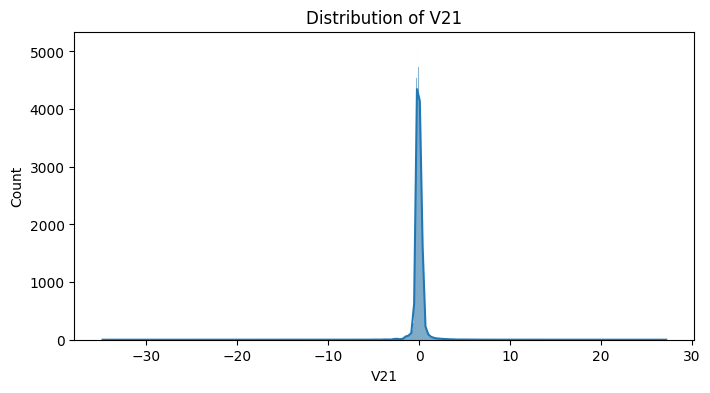

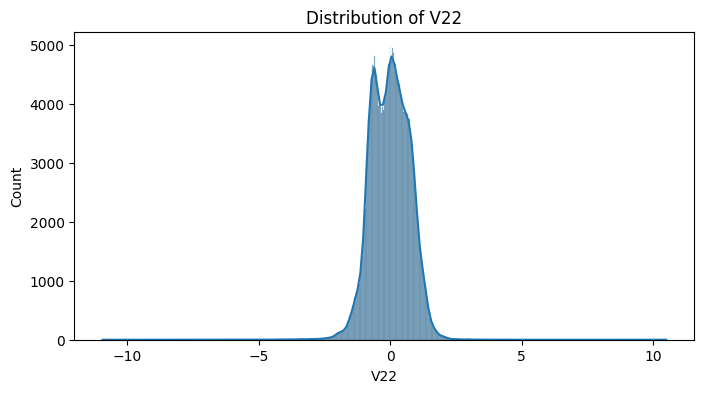

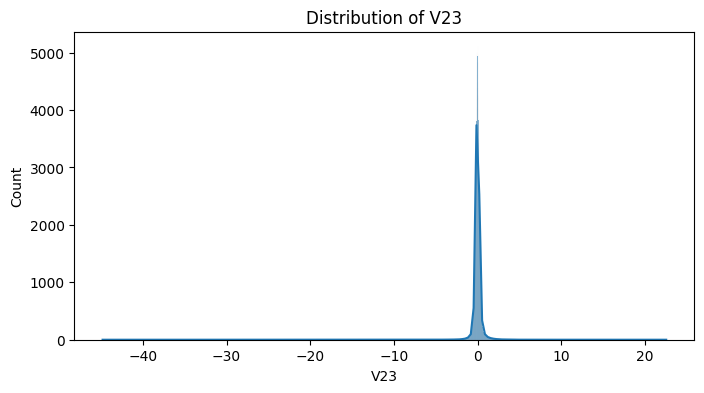

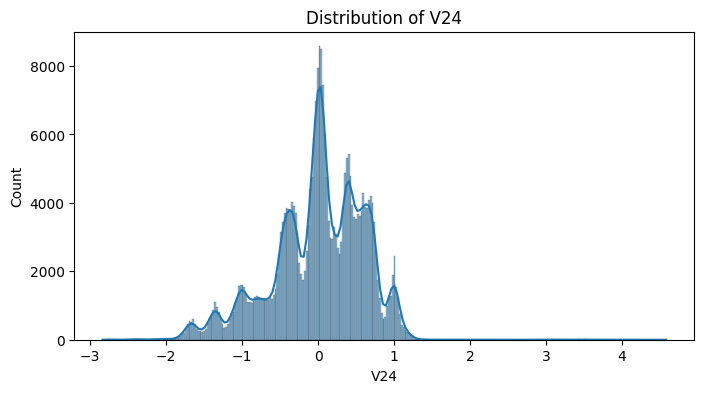

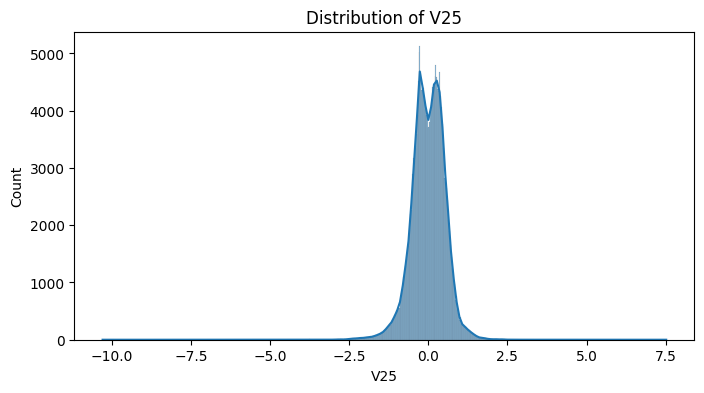

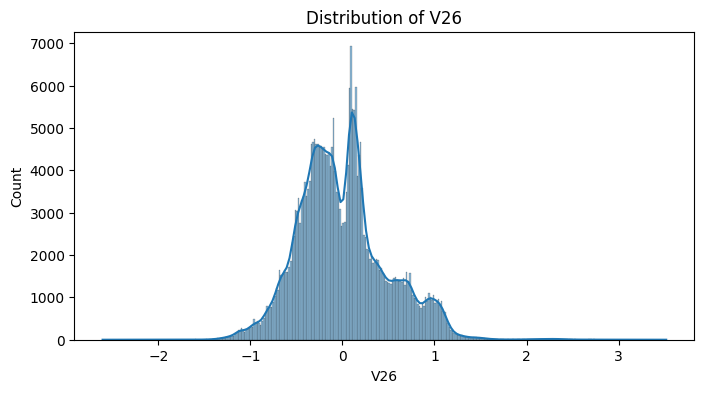

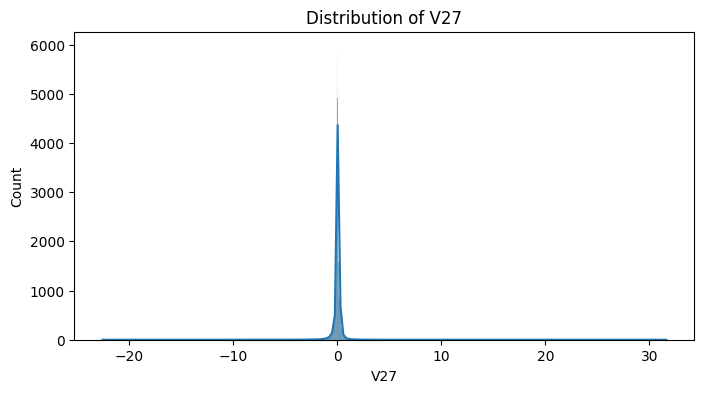

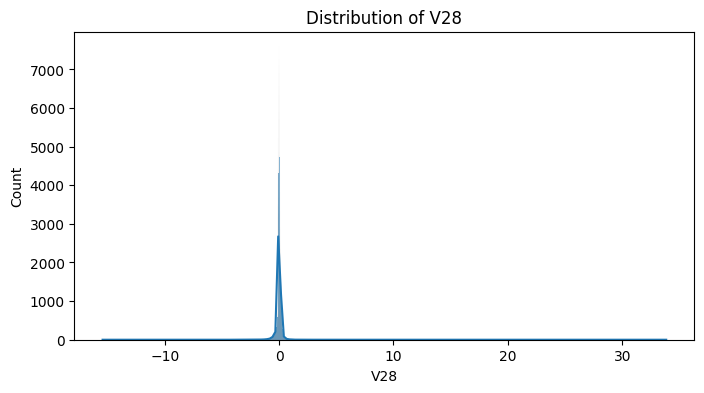

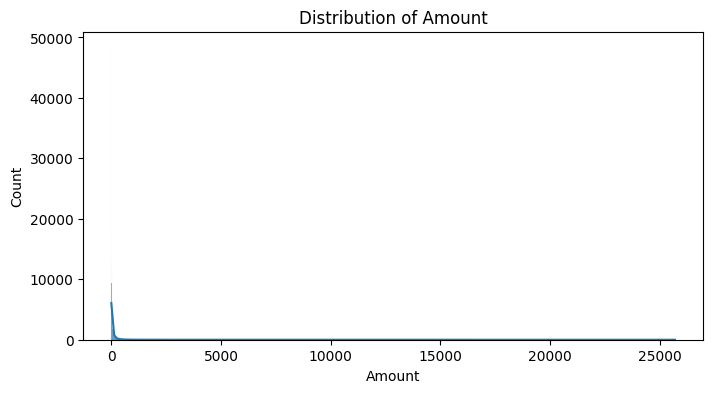

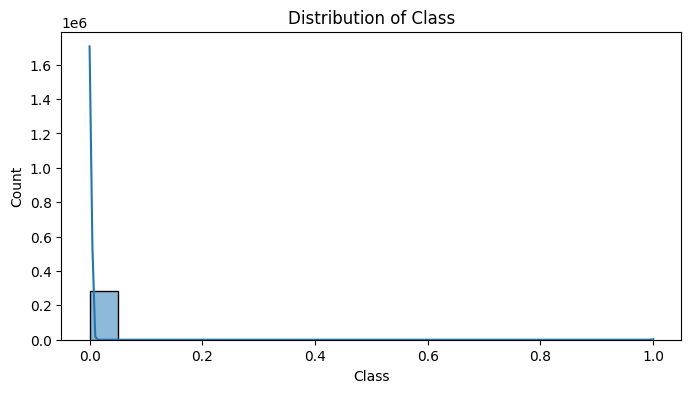

In [15]:

# 3. Exploratory Data Analysis (EDA)
perform_eda(fraud_data)
perform_eda(creditcard_data)


In [20]:
# Check the data type of the ip_address column
print(fraud_data['ip_address'].dtype)

# Check for missing values
print(fraud_data['ip_address'].isnull().sum())

# Display sample values
print(fraud_data['ip_address'].head())

float64
0
0    7.327584e+08
1    3.503114e+08
2    2.621474e+09
3    3.840542e+09
4    4.155831e+08
Name: ip_address, dtype: float64


In [22]:
# 4. Merge Datasets for Geolocation Analysis
fraud_data = merge_geolocation_data(fraud_data, ip_country)

In [23]:
# Check the merged dataset
print(fraud_data.head())

# Verify the ip_address column
print(fraud_data['ip_address'].unique())

# Verify the country column
print(fraud_data['country'].unique())

   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address  class  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0   

   lower_bound_ip_address  upper_bound_ip_address country  
0                     NaN                     NaN     NaN  
1                     NaN                     NaN     NaN  
2                   

In [24]:

# 5. Feature Engineering
fraud_data = create_features(fraud_data)


In [27]:
# 6. Normalization and Scaling

# Normalize fraud_data
fraud_numerical_cols = ['purchase_value', 'age']  # Only these columns exist in fraud_data
fraud_data = normalize_data(fraud_data, fraud_numerical_cols)

# Normalize creditcard_data
creditcard_numerical_cols = ['Amount']  # Only this column exists in creditcard_data
creditcard_data = normalize_data(creditcard_data, creditcard_numerical_cols)


In [28]:
# Check fraud_data after normalization
print(fraud_data[['purchase_value', 'age']].head())

# Check creditcard_data after normalization
print(creditcard_data[['Amount']].head())

   purchase_value       age
0       -0.160204  0.679914
1       -1.142592  2.304476
2       -1.197169  2.304476
3        0.385567  0.911994
4        0.112681  1.376155
     Amount
0  0.244200
1 -0.342584
2  1.158900
3  0.139886
4 -0.073813


In [29]:

# 7. Encode Categorical Features
categorical_cols = ['source', 'browser', 'sex']
fraud_data = encode_categorical_features(fraud_data, categorical_cols)


In [30]:

# Save the preprocessed data
fraud_data.to_csv('../data/Fraud_Data_Preprocessed.csv', index=False)
creditcard_data.to_csv('../data/creditcard_Preprocessed.csv', index=False)